In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.shape

(7043, 21)

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop("customerID",axis=1,inplace=True)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
type(df["TotalCharges"][0])

str

In [8]:
type(df["MonthlyCharges"][0])

numpy.float64

In [9]:
df["TotalCharges"].isna().sum()

0

In [10]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors="coerce") #coerce = "convert what you can, and turn the rest into NaN without crashing".

In [11]:
df["TotalCharges"].isna().sum()

11

In [12]:
df[df["TotalCharges"].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [13]:
df1 = df.dropna(axis=0)


In [14]:
df1["TotalCharges"].isna().sum()

0

In [15]:
df1["TotalCharges"].dtypes

dtype('float64')

### Exploratory Data Analysis

In [16]:
df1[df1["Churn"]=="Yes"]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [17]:
tenure_churn_yes = df1[df1["Churn"]=="Yes"]["tenure"]
tenure_churn_no = df1[df1["Churn"]=="No"]["tenure"]

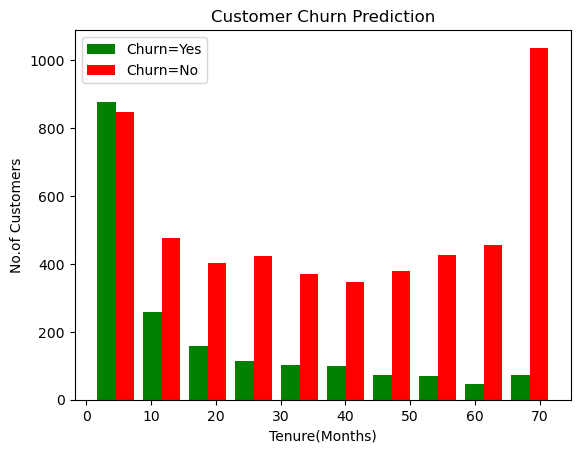

In [18]:
plt.hist([tenure_churn_yes,tenure_churn_no],color=["green","red"],label=["Churn=Yes","Churn=No"])
plt.xlabel("Tenure(Months)")
plt.ylabel("No.of Customers")
plt.title("Customer Churn Prediction")
plt.legend()
plt.show()

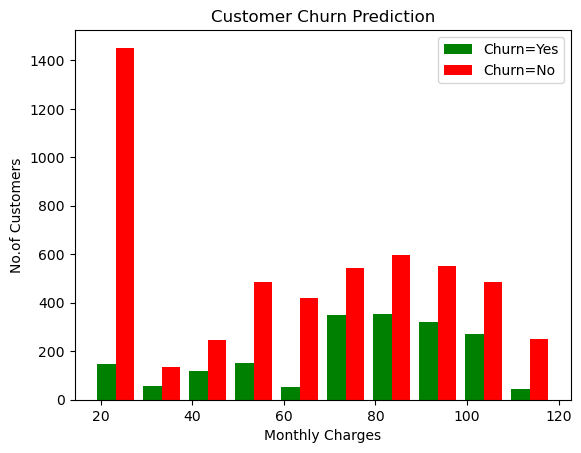

In [19]:
charges_churn_yes = df1[df1["Churn"]=="Yes"]["MonthlyCharges"]
charges_churn_no = df1[df1["Churn"]=="No"]["MonthlyCharges"]

plt.hist([charges_churn_yes,charges_churn_no],color=["green","red"],label=["Churn=Yes","Churn=No"])
plt.xlabel("Monthly Charges")
plt.ylabel("No.of Customers")
plt.title("Customer Churn Prediction")
plt.legend()
plt.show()

In [20]:
df1["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

### Data Cleaning

In [21]:
def cat_cols():
    for col in df1.columns:
        if df1[col].dtypes=="object":
            print(f"{col} => {df1[col].unique()}")

In [22]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\Chatla Manikanta\AppData\Local\Temp\ipykernel_1448\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\Chatla Manikanta\AppData\Local\Temp\ipykernel_1448\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [23]:
cat_cols()

gender => ['Female' 'Male']
Partner => ['Yes' 'No']
Dependents => ['No' 'Yes']
PhoneService => ['No' 'Yes']
MultipleLines => ['No' 'Yes']
InternetService => ['DSL' 'Fiber optic' 'No']
OnlineSecurity => ['No' 'Yes']
OnlineBackup => ['Yes' 'No']
DeviceProtection => ['No' 'Yes']
TechSupport => ['No' 'Yes']
StreamingTV => ['No' 'Yes']
StreamingMovies => ['No' 'Yes']
Contract => ['Month-to-month' 'One year' 'Two year']
PaperlessBilling => ['Yes' 'No']
PaymentMethod => ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn => ['No' 'Yes']


In [24]:
cols_to_encode = ["Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection",
                 "TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","Churn"]

for col in cols_to_encode:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\Chatla Manikanta\AppData\Local\Temp\ipykernel_1448\1877510306.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1,'No':0},inplace=True)
C:\Users\Chatla Manikanta\AppData\Local\Temp\ipykernel_1448\1877510306.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[co

In [25]:
df1["Dependents"].dtypes

dtype('int64')

In [26]:
def get_cols(df):
    for col in df.columns:
        print(f"{col} => {df[col].unique()}")

In [27]:
df1["gender"].replace({"Female":1,"Male":0},inplace=True)

C:\Users\Chatla Manikanta\AppData\Local\Temp\ipykernel_1448\3128501519.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["gender"].replace({"Female":1,"Male":0},inplace=True)
C:\Users\Chatla Manikanta\AppData\Local\Temp\ipykernel_1448\3128501519.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)

In [28]:
get_cols(df1)

gender => [1 0]
SeniorCitizen => [0 1]
Partner => [1 0]
Dependents => [0 1]
tenure => [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService => [0 1]
MultipleLines => [0 1]
InternetService => ['DSL' 'Fiber optic' 'No']
OnlineSecurity => [0 1]
OnlineBackup => [1 0]
DeviceProtection => [0 1]
TechSupport => [0 1]
StreamingTV => [0 1]
StreamingMovies => [0 1]
Contract => ['Month-to-month' 'One year' 'Two year']
PaperlessBilling => [1 0]
PaymentMethod => ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges => [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges => [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn => [0 1]


In [29]:
df1_encoded = pd.get_dummies(df1,columns=["InternetService","Contract","PaymentMethod"],drop_first=True)
df1_encoded.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,False,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,False,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,False,False,True,False,False,False,False


In [30]:
get_cols(df1_encoded)

gender => [1 0]
SeniorCitizen => [0 1]
Partner => [1 0]
Dependents => [0 1]
tenure => [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService => [0 1]
MultipleLines => [0 1]
OnlineSecurity => [0 1]
OnlineBackup => [1 0]
DeviceProtection => [0 1]
TechSupport => [0 1]
StreamingTV => [0 1]
StreamingMovies => [0 1]
PaperlessBilling => [1 0]
MonthlyCharges => [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges => [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn => [0 1]
InternetService_Fiber optic => [False  True]
InternetService_No => [False  True]
Contract_One year => [False  True]
Contract_Two year => [False  True]
PaymentMethod_Credit card (automatic) => [False  True]
PaymentMethod_Electronic check => [ True False]
PaymentMethod_Mailed check => [False  True]


In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df1_encoded[["tenure","MonthlyCharges","TotalCharges"]] = scaler.fit_transform(df1_encoded[["tenure","MonthlyCharges","TotalCharges"]])

In [32]:
get_cols(df1_encoded)

gender => [1 0]
SeniorCitizen => [0 1]
Partner => [1 0]
Dependents => [0 1]
tenure => [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService => [0 1]
MultipleLines => [0 1]
OnlineSecurity => [0 1]
OnlineBackup => [1 0]
DeviceProtection => 

In [33]:
df1_encoded.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,0.442560,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,0.463166,0.261309,0.265785
std,0.500014,0.368844,0.499729,0.457629,0.345708,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,0.299363,0.261571,0.441782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.112676,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172512,0.044155,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.394366,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.518408,0.159090,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.760563,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.712562,0.435719,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
X = df1_encoded.drop("Churn",axis=1)
y = df1_encoded["Churn"]

In [35]:
X.shape,y.shape

((7032, 23), (7032,))

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(5625, 23)

In [37]:
import tensorflow as tf
from tensorflow import keras

In [38]:
X_train.shape

(5625, 23)

In [57]:
def ANN():
    model = keras.Sequential([
        keras.Input(shape=(23,)),
        keras.layers.Dense(20,activation="relu"),
        keras.layers.Dense(1,activation="sigmoid")
    ])
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model


In [58]:
model = ANN()
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7446 - loss: 0.5459    
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7974 - loss: 0.4379  
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8018 - loss: 0.4297  
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.8050 - loss: 0.4197
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.8148 - loss: 0.4021
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.8053 - loss: 0.4146
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.8100 - loss: 0.4122
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.8148 - loss: 0.4078
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.8185 - loss: 0.3975
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8074 - loss: 0.4069  
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7980 - loss: 0.4222  
Epoch 12/100
176/

In [59]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7818 - loss: 0.4356 


[0.44928863644599915, 0.7853589057922363]

In [60]:
y_pred = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [61]:
y_pred_new = []
for i in y_pred:
    if i>0.5:
        y_pred_new.append(1)
    else:
        y_pred_new.append(0)
y_pred_new[:5]

[0, 0, 1, 0, 0]

In [62]:
y_test[:5]

2481    0
6784    0
6125    1
3052    0
4099    0
Name: Churn, dtype: int64

In [63]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_new)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[936,  97],
       [205, 169]])>

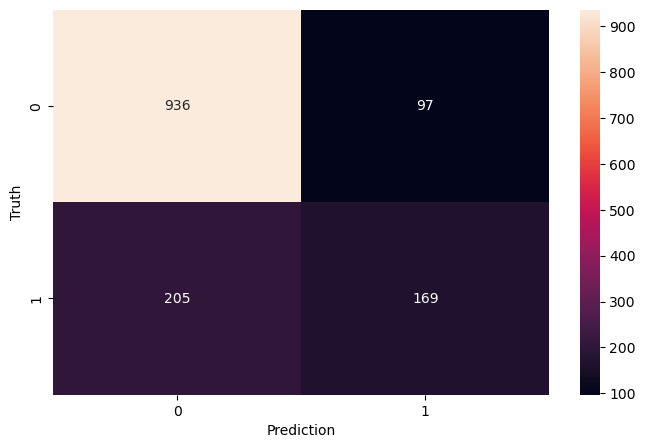

In [64]:
plt.figure(figsize=(8,5))
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.show()

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

cr = classification_report(y_test,y_pred_new)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.45      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.69      1407
weighted avg       0.77      0.79      0.77      1407



In [66]:
cm = confusion_matrix(y_test,y_pred_new)
cm

array([[936,  97],
       [205, 169]], dtype=int64)

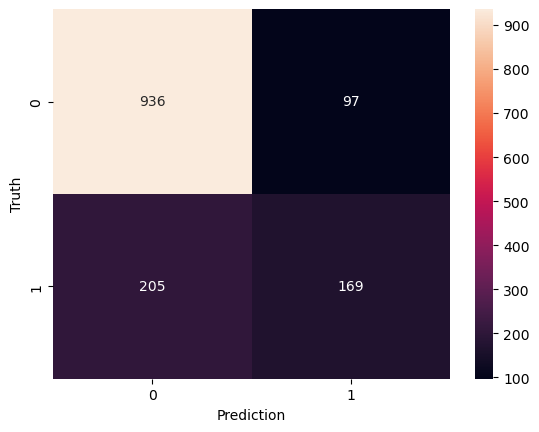

In [67]:
sb.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.show()

In [68]:
len(y_test)

1407

#### Total Accuracy

In [69]:
accuracy = round((900+200)/(900+133+174+200),2)
accuracy

0.78

#### Precision for 0 class i.e., Precision for customers who did't churn

In [70]:
precision_0 = round((900)/(900+174),2)
precision_0

0.84

#### Precision for 1 class i.e., Precision for customers who actually churn

In [71]:
precision_1 = round((200)/(133+200),2)
precision_1

0.6

#### Recall for 0 class

In [72]:
recall_0 = round(900/(900+133),2)
recall_0

0.87

#### Recall for 1 class

In [73]:
recall_1 = round(200/(200+174),2)
recall_1

0.53

#### F1-score for class 0

In [74]:
f1_score_0 = round(2*(precision_0*recall_0)/(precision_0+recall_0),2)
f1_score_0

0.85

#### F1-score for class 1

In [75]:
f1_score_1 = round(2*(precision_1*recall_1)/(precision_1+recall_1),2)
f1_score_1

0.56

## Handling Class Imbalance

### Using Under Sampling Method-1

In [83]:
df1_encoded["Churn"].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [84]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus,y_rus = rus.fit_resample(X,y)

In [85]:
X_rus.shape,X.shape

((3738, 23), (7032, 23))

In [91]:
y_rus.value_counts()

Churn
0    1869
1    1869
Name: count, dtype: int64

In [93]:
X_train_us,X_test_us,y_train_us,y_test_us = train_test_split(X_rus,y_rus,test_size=0.2,random_state=42)

In [94]:
model_rus = ANN()
model_rus.fit(X_train_us,y_train_us,epochs=100)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5575 - loss: 0.6959   
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7168 - loss: 0.5910  
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7477 - loss: 0.5264  
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - accuracy: 0.7554 - loss: 0.5094
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7510 - loss: 0.5097  
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7675 - loss: 0.4928  
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7680 - loss: 0.4882  
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.7656 - loss: 0.4897
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7818 - loss: 0.4731  
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7660 - loss: 0.4856  
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7659 - loss: 0.4926 
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0

In [95]:
model_rus.evaluate(X_test_us,y_test_us)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7392 - loss: 0.4980 


[0.5168601274490356, 0.7379679083824158]

### Method-2

In [96]:
count_class_0,count_class_1 = df1_encoded["Churn"].value_counts()
df_class_0 = df1_encoded[df1_encoded["Churn"]==0]
df_class_1 = df1_encoded[df1_encoded["Churn"]==1]

In [97]:
count_class_0,count_class_1

(5163, 1869)

In [98]:
df_class_0.shape

(5163, 24)

In [99]:
df_class_1.shape

(1869, 24)

In [100]:
df_class_0 = df_class_0.sample(count_class_1)
df_class_0.shape

(1869, 24)

In [101]:
df_test_under = pd.concat([df_class_0,df_class_1],axis=0)
df_test_under.shape

(3738, 24)

In [102]:
df_test_under["Churn"].value_counts()

Churn
0    1869
1    1869
Name: count, dtype: int64

In [103]:
X = df_test_under.drop("Churn",axis=1)
y = df_test_under["Churn"]

X_train_under,X_test_under,y_train_under,y_test_under = train_test_split(X,y,test_size=0.2,random_state=42)


In [122]:
y_test_under.value_counts()

Churn
0    1033
1    1033
Name: count, dtype: int64

In [104]:
model_under = ANN()
model_under.fit(X_train_under,y_train_under,epochs=100)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4505 - loss: 0.7342 
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6995 - loss: 0.6028 
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7451 - loss: 0.5333 
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7479 - loss: 0.5194 
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7607 - loss: 0.5086 
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7656 - loss: 0.4933 
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7597 - loss: 0.5062 
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7447 - loss: 0.5066 
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7570 - loss: 0.4886 
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7540 - loss: 0.4953 
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7485 - loss: 0.4911 
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

In [105]:
model_under.evaluate(X_test_under,y_test_under)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7362 - loss: 0.5425  


[0.5217560529708862, 0.75]

In [107]:
y_pred = model_under.predict(X_test_under)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


array([[0.10478779],
       [0.31542617],
       [0.03568493],
       [0.05572521],
       [0.7134294 ]], dtype=float32)

In [110]:
cr = classification_report(y_test_under,np.round(y_pred))
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       379
           1       0.72      0.80      0.76       369

    accuracy                           0.75       748
   macro avg       0.75      0.75      0.75       748
weighted avg       0.75      0.75      0.75       748



## Using Over Sampling

In [111]:
df_class_0.shape

(1869, 24)

In [112]:
df_class_1.shape

(1869, 24)

In [114]:
df_class_0 = df1_encoded[df1_encoded["Churn"]==0]
df_class_1 = df1_encoded[df1_encoded["Churn"]==1]

df_class_0.shape,df_class_1.shape,count_class_0,count_class_1

((5163, 24), (1869, 24), 5163, 1869)

In [115]:
df_class_over = df_class_1.sample(count_class_0,replace=True)
df_class_over.shape

(5163, 24)

In [116]:
df_test_over = pd.concat([df_class_0,df_class_over],axis=0)
df_test_over.shape

(10326, 24)

In [118]:
df_test_over["Churn"].value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [123]:
X = df_test_over.drop("Churn",axis=1)
y = df_test_over["Churn"]

X_train_over,X_test_over,y_train_over,y_test_over = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

y_test_over.value_counts()


Churn
0    1033
1    1033
Name: count, dtype: int64

In [124]:
model_over = ANN()
model_over.fit(X_train_over,y_train_over,epochs=100)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6471 - loss: 0.6269 
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7590 - loss: 0.5030  
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7616 - loss: 0.4897  
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7614 - loss: 0.4916  
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7689 - loss: 0.4856  
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7763 - loss: 0.4801  
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7805 - loss: 0.4684  
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7765 - loss: 0.4766  
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7824 - loss: 0.4686  
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7758 - loss: 0.4766  
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7819 - loss: 0.4605  
Epoch 12/100
259/259

In [126]:
model_over.evaluate(X_test_over,y_test_over)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7757 - loss: 0.4719   


[0.4893151521682739, 0.7671829462051392]

In [127]:
y_pred = model_over.predict(X_test_over)

cr = classification_report(y_test_over,np.round(y_pred))
print(cr)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1033
           1       0.75      0.81      0.78      1033

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



## Using SMOTE (Over Sampling)

In [128]:
df1_encoded["Churn"].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [130]:
X = df1_encoded.drop("Churn",axis=1)
y = df1_encoded["Churn"]

In [131]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(sampling_strategy="minority")
X_smt,y_smt = smt.fit_resample(X,y)

In [132]:
y_smt.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [134]:
X_train,X_test,y_train,y_test = train_test_split(X_smt,y_smt,test_size=0.2,random_state=42,stratify=y_smt)
y_train.value_counts()

Churn
0    4130
1    4130
Name: count, dtype: int64

In [135]:
y_test.value_counts()

Churn
0    1033
1    1033
Name: count, dtype: int64

In [136]:
model_smt = ANN()
model_smt.fit(X_train,y_train,epochs=100)

Epoch 1/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6306 - loss: 0.6408 
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7647 - loss: 0.4826  
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7696 - loss: 0.4774  
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7702 - loss: 0.4776  
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7781 - loss: 0.4550  
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7752 - loss: 0.4673  
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7739 - loss: 0.4684   
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7825 - loss: 0.4628    
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7774 - loss: 0.4655  
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7803 - loss: 0.4570  
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7854 - loss: 0.4544  
Epoch 12/100
259/

In [137]:
model_smt.evaluate(X_test,y_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7893 - loss: 0.4482   


[0.45442724227905273, 0.7826718091964722]

In [138]:
y_pred = model_smt.predict(X_test)

cr = classification_report(y_test,np.round(y_pred))
print(cr)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1033
           1       0.78      0.78      0.78      1033

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066

